# Random Forest Classifier, SVM with RBF Kernel, and Softmax Classifier

## Data Preprocessing

In [1]:
#Import the Libraries and the CIFAR-10 Dataset

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the Data and Split into Training and Test Sets

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
#Shape of the dataset
#Number of images in training set = 50000
#Number of images in testing set = 10000
#Height and Width of each image = 32x32
#Number of channels in each image = 3

print("Shape of Training Images: ", X_train.shape)
print("Shape of Testing Images: ", X_test.shape)

Shape of Training Images:  (50000, 32, 32, 3)
Shape of Testing Images:  (10000, 32, 32, 3)


In [4]:
#Convert Labels to 1-D Array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [5]:
#Let's Store the name of each label in a List
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
          'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


#Function Definition to Display Image

def display_image(flag, i):
    #flag is a variable that allows one to display images from the training set or test set
    #If flag = 1, Then display Image from Training Set
    #If flag != 1, Then display Image from Test Set
    #i is the index
    
    plt.figure(figsize = (10,2))
    
    if flag == 1:
        plt.imshow(X_train[i])
        plt.xlabel('Training Set Image is: ' + labels[y_train[i]])
    
    if flag != 1:
        plt.imshow(X_test[i])
        plt.xlabel('Test Set Image is: ' + labels[y_test[i]])


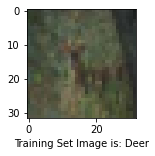

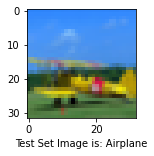

In [6]:
#Display Image from Training Set
display_image(1, 10)

#Display Image from Test Set
display_image(-1, 44)

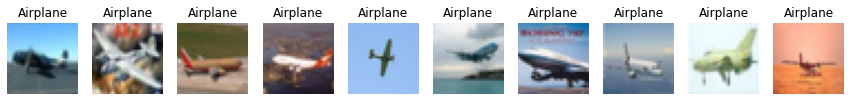

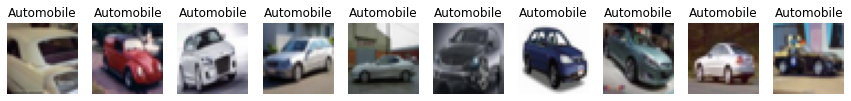

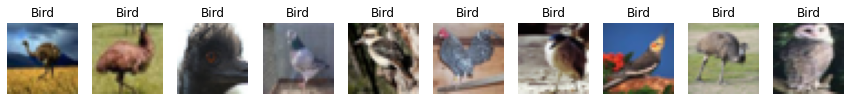

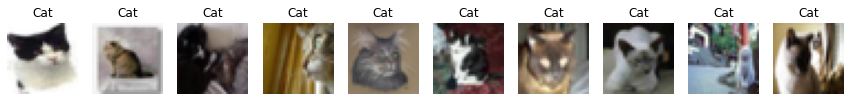

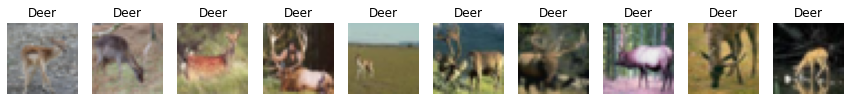

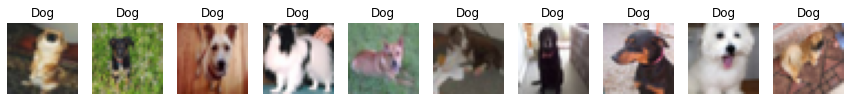

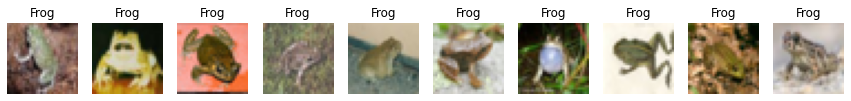

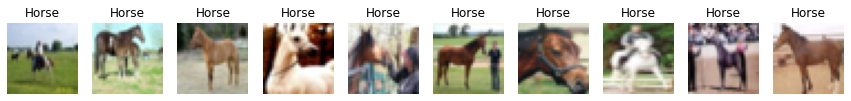

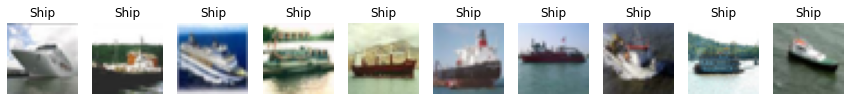

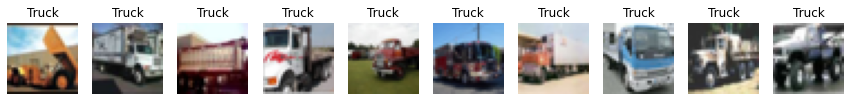

In [8]:
#Generate 10 Random Images for Each Class

num_samples = 10
for i in range(len(labels)):
    images = X_train[y_train.flatten() == i]
    random_indices = np.random.choice(len(images), num_samples, replace=False)
    random_images = images[random_indices]
    
    # Plot the images
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 15))
    for j in range(num_samples):
        axs[j].imshow(random_images[j])
        axs[j].axis('off')
        axs[j].set_title(labels[i])
    plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

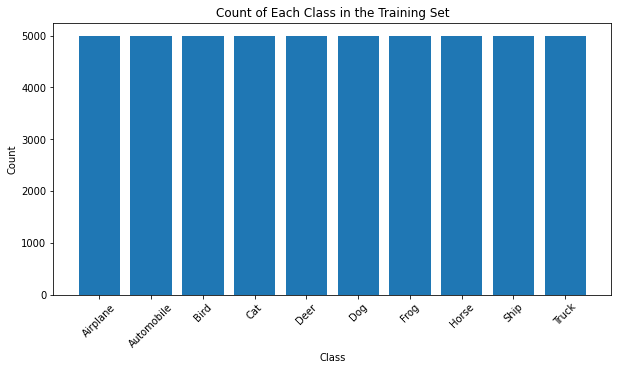

In [11]:
#Count of Each Class in the Training Set
class_counts_train = [0] * 10

for i in range(len(y_train)):
    class_counts_train[y_train[i]] += 1


plt.figure(figsize = (10,5))
plt.bar(labels, class_counts_train)

# Add title and axis labels
plt.title('Count of Each Class in the Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

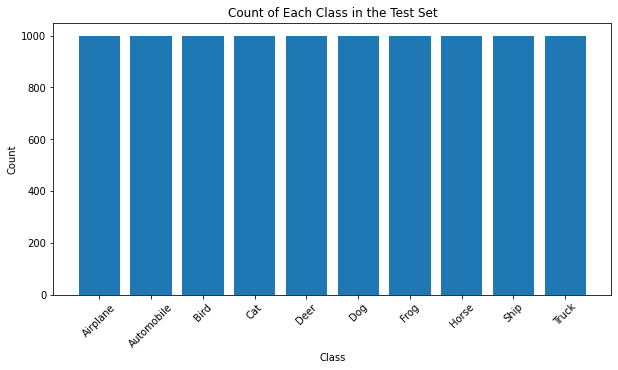

In [12]:
#Count of Each Class in the Test Set
class_counts_test = [0] * 10

for i in range(len(y_test)):
    class_counts_test[y_test[i]] += 1


plt.figure(figsize = (10,5))
plt.bar(labels, class_counts_test)

# Add title and axis labels
plt.title('Count of Each Class in the Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation = 45)

In [11]:
#Normalize the Pixel Values

X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

## Random Forest Classifier

In [17]:
#Create copies of the training and test sets to be used for the Random Forest Classifier

X_train_rf = X_train_norm.copy()
X_test_rf = X_test_norm.copy()

y_train_rf = y_train.copy()
y_test_rf = y_test.copy()

#Flatten each image in the Training and Test Sets to a vector of length 32*32*3 = 3072
X_train_rf = X_train_rf.reshape(X_train_rf.shape[0], -1)
X_test_rf = X_test_rf.reshape(X_test_rf.shape[0], -1)

In [18]:
#Import the Libraries and Build and Train the Model

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

history_rf = random_forest.fit(X_train_rf, y_train_rf)

In [19]:
#Make the Predictions on the Test Set

y_pred_test_rf = random_forest.predict(X_test_rf)

In [23]:
#Let's Print the Classification Report of the Predictions on the Test Set

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test_rf, y_pred_test_rf))
print("Accuracy on Test Set is: ", accuracy_score(y_test_rf, y_pred_test_rf)*100.0, "%")

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.52      0.55      0.54      1000
           2       0.38      0.35      0.36      1000
           3       0.35      0.29      0.32      1000
           4       0.41      0.41      0.41      1000
           5       0.44      0.41      0.42      1000
           6       0.47      0.57      0.52      1000
           7       0.52      0.46      0.49      1000
           8       0.58      0.61      0.60      1000
           9       0.47      0.56      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.47      0.48      0.47     10000

Accuracy on Test Set is:  47.52 %


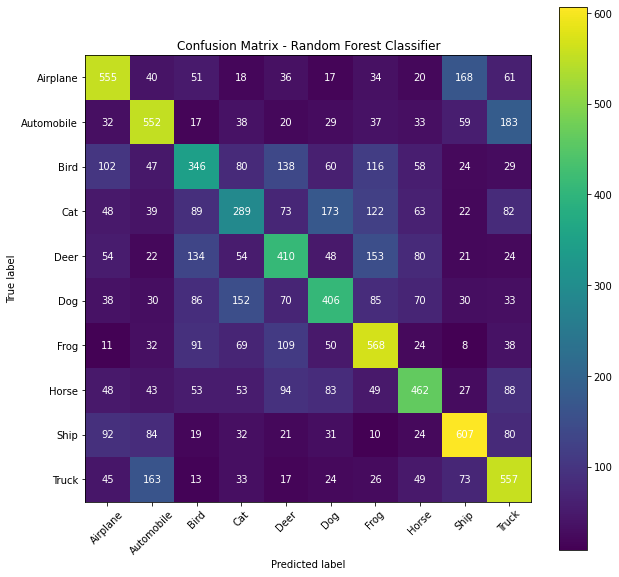

In [24]:
#Display the Confusion Matrix

cm = confusion_matrix(y_test_rf, y_pred_test_rf)
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap='viridis')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(10), labels, rotation = 45)
plt.yticks(np.arange(10), labels)
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Support Vector Machine (SVM) with Radial Basis Function Kernel

In [33]:
#Create copies of the training and test sets to be used for the Support Vector Machine

X_train_svm = X_train_norm.copy()
X_test_svm = X_test_norm.copy()

y_train_svm = y_train.copy()
y_test_svm = y_test.copy()

#Flatten each image in the Training and Test Sets to a vector of length 32*32*3 = 3072
X_train_svm = X_train_svm.reshape(X_train_svm.shape[0], -1)
X_test_svm = X_test_svm.reshape(X_test_svm.shape[0], -1)

In [35]:
#We Will perform PCA to reduce the number of dimensions in the Training and Test Sets 
#This is due to computational issues with 3072 dimensions
#This will avoid the Curse of Dimensionality

from sklearn.decomposition import PCA

pca = PCA(n_components = 200, whiten = True)
pca.fit(X_train_svm)
X_train_svm = pca.transform(X_train_svm) 
X_test_svm = pca.transform(X_test_svm) 

In [39]:
#Let's build and Train the SVM model using Radial Basis Function

from sklearn.svm import SVC

clf = SVC(kernel = 'rbf', C = 10, gamma = 'scale')
clf.fit(X_train_svm, y_train_svm)

SVC(C=10)

In [40]:
#Let's save the model

import pickle

filename = "SVM.pickle"
pickle.dump(clf, open(filename, "wb"))

In [41]:
#Load the Model and Predict on the Test Set

clf_loaded_model = pickle.load(open(filename, "rb"))

y_pred_test_svm = clf_loaded_model.predict(X_test_svm)

In [42]:
#Let's Print the Classification Report of the Predictions on the Test Set

print(classification_report(y_test_svm, y_pred_test_svm))
print("Accuracy on Test Set is: ", accuracy_score(y_test_svm, y_pred_test_svm)*100.0, "%")

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1000
           1       0.65      0.71      0.68      1000
           2       0.46      0.45      0.45      1000
           3       0.39      0.42      0.40      1000
           4       0.54      0.49      0.51      1000
           5       0.47      0.45      0.46      1000
           6       0.65      0.62      0.63      1000
           7       0.67      0.61      0.64      1000
           8       0.72      0.67      0.69      1000
           9       0.57      0.64      0.60      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000

Accuracy on Test Set is:  57.13 %


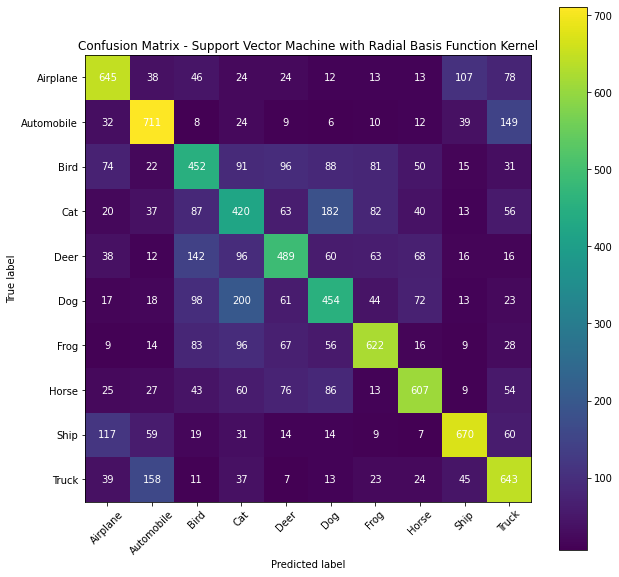

In [43]:
#Display the Confusion Matrix

cm = confusion_matrix(y_test_svm, y_pred_test_svm)
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap='viridis')
plt.title('Confusion Matrix - Support Vector Machine with Radial Basis Function Kernel')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(10), labels, rotation = 45)
plt.yticks(np.arange(10), labels)
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Softmax Classifier

In [44]:
#Create copies of the training and test sets to be used for the Softmax Classifier

import tensorflow as tf
from tensorflow.keras import layers, models

X_train_sc = X_train_norm.copy()
X_test_sc = X_test_norm.copy()

y_train_sc = y_train.copy()
y_test_sc = y_test.copy()

In [61]:
#Let's build the model

sc_model = tf.keras.Sequential()
sc_model.add(layers.Flatten(input_shape = (32, 32, 3)))
sc_model.add(layers.Dense(256, activation = 'relu'))
sc_model.add(layers.Dense(128, activation = 'relu'))
sc_model.add(layers.Dense(64, activation = 'relu'))
sc_model.add(layers.Dense(10, activation = 'softmax'))

#Compile the Model
sc_model.compile("adam", "sparse_categorical_crossentropy", metrics=["Accuracy"])

#Display Model Summary
sc_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 256)               786688    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [62]:
#Train the Model on the Training Set

history_sc = sc_model.fit(X_train_sc, y_train_sc, epochs = 20, validation_split = 0.2)

Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8865 - Accuracy: 0.3154 - val_loss: 1.7710 - val_Accuracy: 0.3548
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7200 - Accuracy: 0.3807 - val_loss: 1.6949 - val_Accuracy: 0.3905
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6410 - Accuracy: 0.4090 - val_loss: 1.7174 - val_Accuracy: 0.3899
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5820 - Accuracy: 0.4300 - val_loss: 1.5880 - val_Accuracy: 0.4343
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5355 - Accuracy: 0.4526 - val_loss: 1.5869 - val_Accuracy: 0.4372
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5035 - Accuracy: 0.4612 - val_loss: 1.5442 - val_Accuracy: 0.4473
Epoch 7/20
1250/1250 [==============================] - 12s 9ms/step - loss: 1.4781 - Accuracy: 0.4711 - val_loss: 1.5601 - val_A

In [63]:
#Let's Save the Model
sc_model.save('Softmax_Classifier_CIFAR.h5')
print('Model Saved!')

#Let's Save the Model Weights
sc_model.save_weights('Softmax_Classifier_CIFAR_Weights')
print('Model Weights Saved!')

#load the model
savedModel = models.load_model('Softmax_Classifier_CIFAR.h5')
savedModel.summary()

#Load the Model Weights
savedModel = sc_model.load_weights('Softmax_Classifier_CIFAR_Weights')
print('Model Loaded!')

Model Saved!
Model Weights Saved!
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 256)               786688    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Model Loaded!


In [64]:
#Evaluate the model on the Test Set

sc_model.evaluate(X_test_sc, y_test_sc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4760 - Accuracy: 0.4886


[1.476041555404663, 0.4885999858379364]

In [65]:
#Predict on the Test Set

label_pred_prob_sc = sc_model.predict(X_test_sc)

y_pred_test_sc = []

for i in label_pred_prob_sc:
    y_pred_test_sc.append(np.argmax(i))

313/313 [==============================] - 1s 2ms/step


In [66]:
#Let's Print the Classification Report of the Predictions on the Test Set

print(classification_report(y_test_sc, y_pred_test_sc))
print("Accuracy on Test Set is: ", accuracy_score(y_test_sc, y_pred_test_sc)*100.0, "%")

              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1000
           1       0.65      0.54      0.59      1000
           2       0.39      0.36      0.37      1000
           3       0.36      0.24      0.29      1000
           4       0.41      0.43      0.42      1000
           5       0.43      0.37      0.39      1000
           6       0.44      0.64      0.52      1000
           7       0.53      0.55      0.54      1000
           8       0.63      0.60      0.62      1000
           9       0.51      0.61      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000

Accuracy on Test Set is:  48.86 %


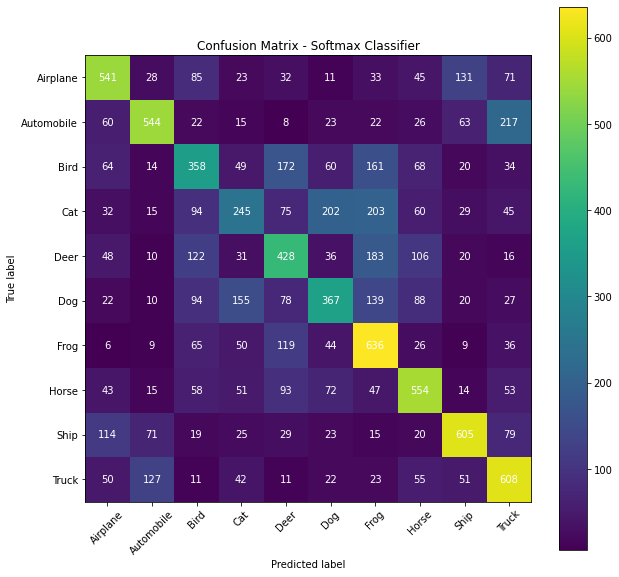

In [67]:
#Display the Confusion Matrix

cm = confusion_matrix(y_test_sc, y_pred_test_sc)
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap='viridis')
plt.title('Confusion Matrix - Softmax Classifier')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(10), labels, rotation = 45)
plt.yticks(np.arange(10), labels)
for i in range(10):
    for j in range(10):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

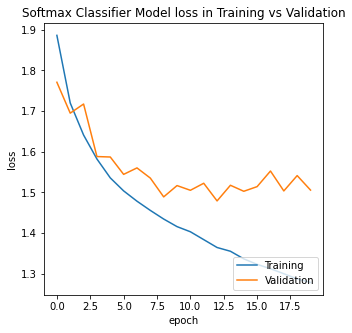

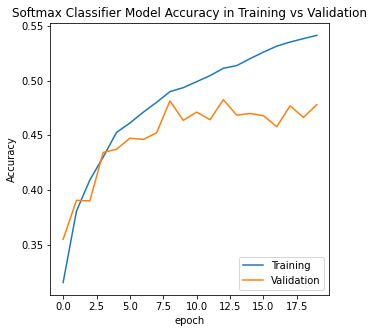

In [80]:
#Plot the change in Training Loss, Training Accuracy, Validation Loss, and Validation Accuracy across Epochs

metrics = history_sc.history.keys()

for param in metrics:
    if 'val' in param:
        continue
    plt.figure(figsize=(5, 5))
    plt.plot(history_sc.history[param])
    plt.plot(history_sc.history['val_' + param])
    plt.title('Softmax Classifier Model ' + param.split('_')[0] + 
              ' in Training vs Validation')
    plt.ylabel(param.split('_')[0])
    plt.xlabel('epoch')
    plt.legend(['Training', 'Validation'], loc = 'lower right')
    plt.show()
